In [31]:
import pandas as pd
import numpy as np
import random

## Correlation of metrics
Emotion - Moderate-Highcorrelation with engagement, behaviors and attentiveness

HeadGaze - Moderate-High Correlation, facing front fairly justify attentivness, looking away is obvious disengagement

Motion - Low-Moderate Correlation, increasing micro-motions shows correlation with attentivness (Reseach Article)

HandPose - High Correlation, raising hands definitely engagement with current session 

SleepPose - High correlation, detected = not engaged

Correlation ranking
1. HandPose
2. SleepPose
3. Emotion
4. HeadGaze
5. Motion

### Futhermore, we split the various metrices into their individual components/ranking
1. HandPose (1 if raised, 0 if not)
2. SleepPose (1 if sleep, 0 if not)
3. Emotion

    a. Happy

    b. Angry
    
    c. Disgusted
    
    d. Fearful
    
    e. Neutral
    
    f. Sad
    
    g. Surprised
    
    
4. HeadGaze (2 if facing front, 1 if sideways, 0 if back)

5. Motion tbc

In [32]:
categories = ['Happy', 'Angry', 'Disgusted','Sad', 'Neutral', 'HandRaised', 'Sleep', 'HeadGaze', 'Engagement']
emo_list = ['Happy', 'Angry', 'Disgusted', 'Sad', 'Neutral']

df = pd.DataFrame(index = range(0,3000), columns = categories)

In [33]:
def inputEmotions(df, emo_list):
    for row in range(3000):
        #generate a random probability function (array) which adds up to one, returns a list of list after .tolist()
        randArray = np.array(np.random.dirichlet(np.ones(5), size = 1)).tolist()[0]
        for i in range(5):
            df[emo_list[i]].iloc[row] = randArray[i] 

In [34]:
#we split the categories here carefully because they shouldnt conflict

def _handRaised(x):
    return 1

def _handMid(x):
    return random.randint(0,1)

def _handNotRaised(x):
    return 0

def _handRandom(x):
    return random.randint(0,1)

def _sleep(x):
    return 1

def _notSleep(x):
    return 0

def _sleepRandom(x):
    return random.randint(0,1)

def _headFront(x):
    return 2

def _headModerate(x):
    return random.randint(1,2)

def _headNotFront(x):
    return random.randint(0,1)

def _headRandom(x):
    return random.randint(0,2)

def _engagedHigh(x):
    return random.randint(2,3)

def _engagedMid(x):
    return random.randint(1,2)

def _engagedLow(x):
    return random.randint(1,1)

def _engagedNoise(x):
    return random.randint(1,3)

## Synthetic Data
1. We work with 3000 training examples with this neural network
2. Assuming 10% noise in data, we work with 2700 reliable datasets, 300 noise datsets (random labels)
3. Breaking down the 2700 training examples

#### we break into high, middle and low tier ratings with a few simple rules in place to guide the model to learn
1. high - high happy probability, moderate-low angry/disgusted, handraised 1, sleep 0, headgaze 2
2. mid - moderate emotions probability, handraise random, sleep 0, headgaze 1-2
3. low - low happy probability, moderate-high angry/disgusted, handraised 0, sleep 0/1, headgaze 0,1
4. noise - all are noise
5. engagement - we will take softmax of range 1 to 5, 4-5 being most engaged, 2-3 being mildly engaged, 1 least engaged

In [35]:
inputEmotions(df , emo_list)

In [36]:
#sort df by happy vs not happy
df = df.sort_values(by = ['Happy'], ascending = False)

In [37]:
df.head()

,Happy,Angry,Disgusted,Sad,Neutral,HandRaised,Sleep,HeadGaze,Engagement
756,0.907164,0.0524129,0.0137761,0.0198271,0.00681961,NaN,NaN,NaN,NaN
726,0.883966,0.0417815,0.0277576,0.0340078,0.0124871,NaN,NaN,NaN,NaN
2887,0.87332,0.0496121,0.0182909,0.0342281,0.0245486,NaN,NaN,NaN,NaN
2734,0.861254,0.0489741,0.0794551,0.00208108,0.00823584,NaN,NaN,NaN,NaN
16,0.838685,0.0702206,0.0296875,0.0196856,0.041721,NaN,NaN,NaN,NaN


##### We will sort 900 rows of each tier (high, mid, low), along with 100 each of noise into the NN

In [38]:
#High
df['HandRaised'][:900] = df['HandRaised'][:900].apply(lambda x: _handRaised(x))
df['HandRaised'][900:1000] = df['HandRaised'][900:1000].apply(lambda x: _handRandom(x))
df['Sleep'][:900] = df['Sleep'][:900].apply(lambda x: _notSleep(x))
df['Sleep'][900:1000] = df['Sleep'][900:1000].apply(lambda x: _sleepRandom(x))
df['HeadGaze'][:900] = df['HeadGaze'][:900].apply(lambda x: _headFront(x))
df['HeadGaze'][900:1000] = df['HeadGaze'][900:1000].apply(lambda x: _headRandom(x))

df['Engagement'][:900] = df['Engagement'][:900].apply(lambda x: _engagedHigh(x))
df['Engagement'][900:1000] = df['Engagement'][900:1000].apply(lambda x: _engagedNoise(x))

#Mid
df['HandRaised'][1000:1900] = df['HandRaised'][1000:1900].apply(lambda x: _handMid(x))
df['HandRaised'][1900:2000] = df['HandRaised'][1900:2000].apply(lambda x: _handRandom(x))
df['Sleep'][1000:1900] = df['Sleep'][1000:1900].apply(lambda x: _notSleep(x))
df['Sleep'][1900:2000] = df['Sleep'][1900:2000].apply(lambda x: _sleepRandom(x))
df['HeadGaze'][1000:1900] = df['HeadGaze'][1000:1900].apply(lambda x: _headModerate(x))
df['HeadGaze'][1900:2000] = df['HeadGaze'][1900:2000].apply(lambda x: _headRandom(x))

df['Engagement'][1000:1900] = df['Engagement'][1000:1900].apply(lambda x: _engagedMid(x))
df['Engagement'][1900:2000] = df['Engagement'][1900:2000].apply(lambda x: _engagedNoise(x))

#Low
df['HandRaised'][2000:2900] = df['HandRaised'][2000:2900].apply(lambda x: _handNotRaised(x))
df['HandRaised'][2900:3000] = df['HandRaised'][2900:3000].apply(lambda x: _handNotRaised(x))
df['Sleep'][2000:2900] = df['Sleep'][2000:2900].apply(lambda x: _sleepRandom(x))
df['Sleep'][2900:3000] = df['Sleep'][2900:3000].apply(lambda x: _sleepRandom(x))
df['HeadGaze'][2000:2900] = df['HeadGaze'][2000:2900].apply(lambda x: _headNotFront(x))
df['HeadGaze'][2900:3000] = df['HeadGaze'][2900:3000].apply(lambda x: _headRandom(x))

df['Engagement'][2000:2900] = df['Engagement'][2000:2900].apply(lambda x: _engagedLow(x))
df['Engagement'][2900:3000] = df['Engagement'][2900:3000].apply(lambda x: _engagedNoise(x))

In [39]:
df.shape

(3000, 9)

In [27]:
df = df[df['Happy'] <= 0.80]  
df = df[df['Angry'] <= 0.80] 
df = df[df['Disgusted'] <= 0.80]  

In [40]:
df.to_csv('data.csv', index=False, header=False  )

In [16]:
%matplotlib inline

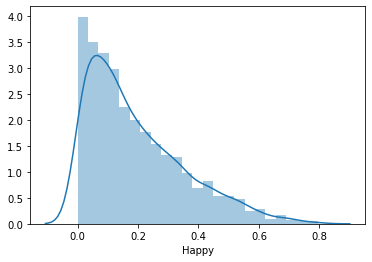

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['Happy']);


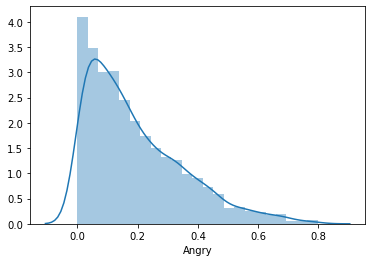

In [29]:
sns.distplot(df['Angry']);

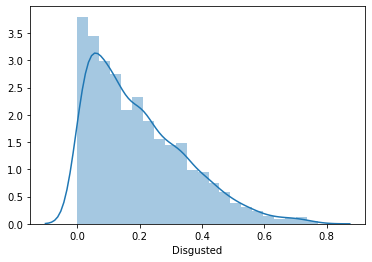

In [30]:
sns.distplot(df['Disgusted']);

In [20]:
def check(x):
    if x[0] + x[1] + x[2] + x[3] + x[4] == 1.0:
        return True
    else:
        return False
    
df['status'] = df.apply(check, axis=1)

In [21]:
df = df[df['status'] == True]  

In [22]:
df = df[categories]